# Feature Engineering

#### Why feature scaling is required

If we do feature scaling, then gradient descent can converge more quickly. Similarly, in deep learning, the feature scale isn't too large or too small, multiplication with corroponding weights is easier and it takes less time. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


pd.pandas.set_option('display.max_columns',None)
df_train=pd.read_csv('train.csv')
X_train,X_test, y_train,y_test=train_test_split(df_train, df_train['SalePrice'],test_size=.1,random_state=0)
del df_train['Id']
print(df_train.shape)
df_train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Important features

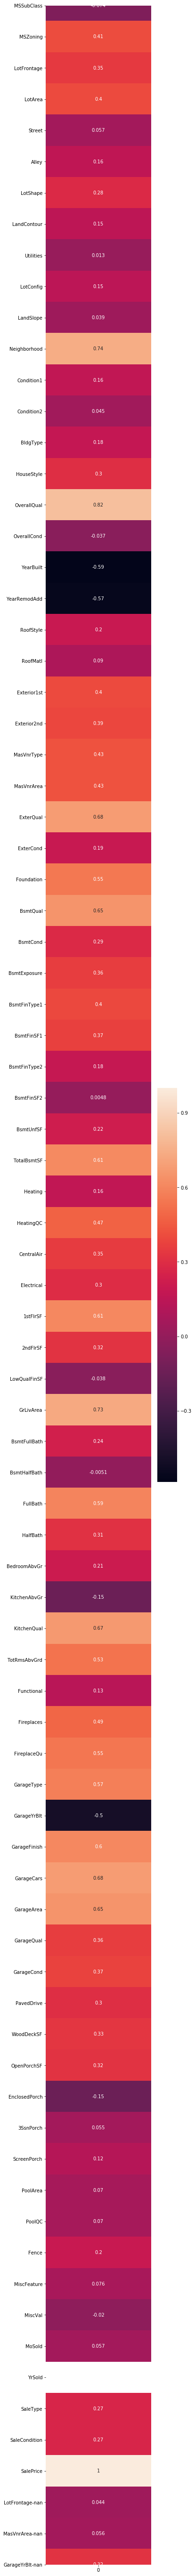

In [49]:
plt.figure(figsize=(5,100))
sns.heatmap(np.asarray(df_train.corr()['SalePrice']).reshape(83,1),annot=True,yticklabels=df_train.corr()['SalePrice'].index)

#### Categorical features : Handling Missing values (replace with 'missing' string) 

In [2]:
categorical_features= [feature for feature in df_train.columns if df_train[feature].dtype=='O']
categorical_features_with_nan = [feature for feature in df_train.columns if int(df_train[feature].isnull().sum())!=0 and feature in categorical_features]

print(categorical_features_with_nan)

for feature in categorical_features_with_nan:
        print("{} : {}% ".format(feature,np.round(df_train[feature].isnull().sum()/df_train.shape[0]*100,2)))
        
df_train[categorical_features_with_nan].isnull().sum()

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Alley : 93.77% 
MasVnrType : 0.55% 
BsmtQual : 2.53% 
BsmtCond : 2.53% 
BsmtExposure : 2.6% 
BsmtFinType1 : 2.53% 
BsmtFinType2 : 2.6% 
Electrical : 0.07% 
FireplaceQu : 47.26% 
GarageType : 5.55% 
GarageFinish : 5.55% 
GarageQual : 5.55% 
GarageCond : 5.55% 
PoolQC : 99.52% 
Fence : 80.75% 
MiscFeature : 96.3% 


Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [3]:
def replace_categorical_with_missing(df_train):
    for feature in categorical_features_with_nan:
        df_train[feature]=df_train[feature].fillna("missing")
    return(df_train)

df_train=replace_categorical_with_missing(df_train)
df_train[categorical_features_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

#### Numerical features : Handling Missing values (replace with median)
We don't use mean because of outliers

In [4]:
numerical_features= [feature for feature in df_train.columns if df_train[feature].dtype!='O']
numerical_features_with_nan = [feature for feature in df_train.columns if int(df_train[feature].isnull().sum())!=0 and feature in numerical_features]

print(numerical_features_with_nan)

for feature in numerical_features_with_nan:
        print("{} : {}% ".format(feature,np.round(df_train[feature].isnull().sum()/df_train.shape[0]*100,2)))
        
df_train[numerical_features_with_nan].isnull().sum()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
LotFrontage : 17.74% 
MasVnrArea : 0.55% 
GarageYrBlt : 5.55% 


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [5]:
def replace_numerical_with_missing(df_train):
    for feature in numerical_features_with_nan:
        df_train[feature+'-nan']=np.where(df_train[feature].isnull(),1,0)
        median_value=df_train[feature].median()
        df_train[feature]=df_train[feature].fillna(median_value)
    return(df_train)

df_train=replace_numerical_with_missing(df_train)
df_train[numerical_features_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Converting temporal variables (YearBuilt should be converted into how many years since built) 

In [6]:
year_feature = [feature for feature in df_train.columns if 'Year' in feature or 'Yr' in feature ]

for feature in year_feature:
    df_train[feature]=df_train['YrSold']-df_train[feature]
df_train[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBlt-nan
0,5,5,5.0,0,0
1,31,31,31.0,0,0
2,7,6,7.0,0,0
3,91,36,8.0,0,0
4,8,8,8.0,0,0


#### Logarithamic transformation of continous categorical features which are not following Gaussian

In [7]:
#Here, just for simplicity, we are transforming 4


for feature in ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']:
    df_train[feature]=np.log(df_train[feature])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage-nan,MasVnrArea-nan,GarageYrBlt-nan
0,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,0,WD,Normal,12.247694,0,0,0
1,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,0,WD,Normal,12.109011,0,0,0
2,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,0,WD,Normal,12.317167,0,0,0
3,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,0,WD,Abnorml,11.849398,0,0,0
4,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,0,WD,Normal,12.429216,0,0,0


#### Handling rare categorical features

In [8]:
for feature in categorical_features:
    df_new=df_train.groupby(feature)['SalePrice'].count()/len(df_train)
    df_new_2=df_new[df_new<.01].index
    df_train[feature]=np.where(df_train[feature].isin(df_new_2),'Rare Label',df_train[feature])

for feature in categorical_features:
    print("\n{}".format(feature))
    for unique_value in(df_train[feature].unique()):
        print("{}:{}".format(unique_value,df_train[df_train[feature]==unique_value].shape[0]))
        


MSZoning
RL:1151
RM:218
Rare Label:10
FV:65
RH:16

Street
Pave:1454
Rare Label:6

Alley
missing:1369
Grvl:50
Pave:41

LotShape
Reg:925
IR1:484
IR2:41
Rare Label:10

LandContour
Lvl:1311
Bnk:63
Low:36
HLS:50

Utilities
AllPub:1459
Rare Label:1

LotConfig
Inside:1052
FR2:47
Corner:263
CulDSac:94
Rare Label:4

LandSlope
Gtl:1382
Mod:65
Rare Label:13

Neighborhood
CollgCr:150
Rare Label:22
Crawfor:51
NoRidge:41
Mitchel:49
Somerst:86
NWAmes:73
OldTown:113
BrkSide:58
Sawyer:74
NridgHt:77
NAmes:225
SawyerW:59
IDOTRR:37
MeadowV:17
Edwards:100
Timber:38
Gilbert:79
StoneBr:25
ClearCr:28
Blmngtn:17
BrDale:16
SWISU:25

Condition1
Norm:1260
Feedr:81
PosN:19
Artery:48
Rare Label:26
RRAn:26

Condition2
Norm:1445
Rare Label:15

BldgType
1Fam:1220
2fmCon:31
Duplex:52
TwnhsE:114
Twnhs:43

HouseStyle
2Story:445
1Story:726
1.5Fin:154
Rare Label:33
SFoyer:37
SLvl:65

RoofStyle
Gable:1141
Hip:286
Rare Label:33

RoofMatl
CompShg:1434
Rare Label:26

Exterior1st
VinylSd:515
MetalSd:220
Wd Sdng:206
HdBoard:222

In [9]:
df_train.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage-nan,MasVnrArea-nan,GarageYrBlt-nan
0,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,0,WD,Normal,12.247694,0,0,0
1,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare Label,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,0,WD,Normal,12.109011,0,0,0
2,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,0,WD,Normal,12.317167,0,0,0
3,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,0,WD,Abnorml,11.849398,0,0,0
4,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,0,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,RL,4.234107,9.186560,Pave,missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,6.522093,790,0,7.293018,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,missing,missing,Shed,480,4,0,WD,Normal,12.128111,1,0,0
96,20,RL,4.356709,9.236398,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,7.370231,0,0,7.370231,0,0,2,0,3,1,Gd,6,Typ,0,missing,Attchd,7.0,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,missing,missing,missing,0,8,0,WD,Normal,12.273731,0,0,0
97,20,RL,4.290459,9.298443,Pave,missing,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,42,42,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,6.866933,0,0,6.866933,1,0,1,0,3,1,TA,6,Typ,0,missing,Attch

#### Convert categorical features into numerical

In [10]:
for feature in categorical_features:
    labels_ordered=df_train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_train[feature]=df_train[feature].map(labels_ordered)

In [11]:
df_train.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage-nan,MasVnrArea-nan,GarageYrBlt-nan
0,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,0,2,3,12.247694,0,0,0
1,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,0,2,3,12.109011,0,0,0
2,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,0,2,3,12.317167,0,0,0
3,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,0,2,0,11.849398,0,0,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,0,2,3,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,3,4.234107,9.186560,1,2,3,1,1,1,0,13,2,1,3,5,6,8,16,16,0,0,10,10,2,68.0,3,2,4,3,4,1,4,310,5,0,370,680,2,3,1,3,6.522093,790,0,7.293018,0,0,2,1,3,1,1,6,4,1,3,5,16.0,3,2,420,2,3,2,232,63,0,0,0,0,0,4,1,480,4,0,2,3,12.128111,1,0,0
96,20,3,4.356709,9.236398,1,2,1,1,1,0,0,14,2,1,3,3,7,5,7,7,0,0,10,10,2,183.0,2,3,4,3,3,3,4,1162,5,0,426,1588,2,4,1,3,7.370231,0,0,7.370231,0,0,2,0,3,1,2,6,4,0,1,4,7.0,2,2,472,2,3,2,158,29,0,0,0,0,0,4,2,0,8,0,2,3,12.273731,0,0,0
97,20,3,4.290459,9.298443,1,2,0,3,1,0,0,5,2,1,3,3,4,5,42,42,2,0,6,5,2,48.0,1,3,2,2,3,1,1,520,5,0,440,960,2,2,1,1,6.866933,0,0,6.866933,1,0,1,0,3,1,1,6,4,0,1,4,42.0,3,1,432,2,3,1,120,0,0,0,0,0,0,4,2,0,5,0,2,3,11.458997,0,0,0
98,30,3,4.442651,9.270965,1,2,0,1,1,1,0,5,2,1,3,3,5,5,90,60,0,0,2,1,1,0.0,1,3,1,2,3,1,4,108,5,0,350,458,2,1,0,3,6.727432,0,0,6.727432,0,0,1,0,2,1,1,5,4,0,1,3,90.0,1,1,366,1,3,2,0,0,77,0,0,0,0,4,1,400,5,0,0,0,11.326596,0,0,0


#### Scaling down the features using minmaxscalar

In [12]:
feature_scale=[feature for feature in df_train.columns if feature not in ['SalePrice']]
minMaxScaler=MinMaxScaler()
df_train[feature_scale]=pd.DataFrame(minMaxScaler.fit_transform(df_train[feature_scale]))

In [14]:
df_train.to_csv('homeprice_after_feature_engineering.csv')